
# K Means Clustering Project: Credit card fraud detection

For this project we will attempt to use KMeans Clustering to cluster credit card transactions as fraudulent or genuine.



## The Data

The Dataset is found in [kaggle](https://www.kaggle.com/dalpozz/creditcardfraud?)
It contains transactions made by credit cards in September 2013 by european cardholders. 
Note that the dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions!!!

## Import Libraries

** Import the libraries we usually use for data analysis.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data

** Read in the creditcard file using read_csv.**

In [3]:
data=pd.read_csv('creditcard.csv')

**Check the head of the data**

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


** Check the info() and describe() methods on the data.**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## EDA

It's time to create some data visualizations!

** Create a scatterplot of V1 versus V2 where the points are colored by the Class column. **

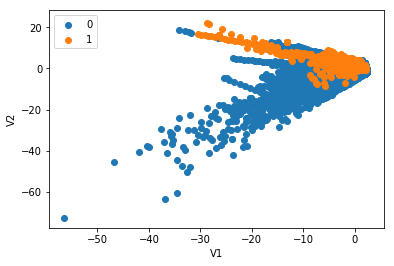

In [7]:
for i in range (2):
    plt.scatter(data.V1[data['Class']==i], data.V2[data['Class']==i], label=i)
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend(loc='upper left')

**Create a scatterplot of Time versus Amount where the points are colored by the Class column.**

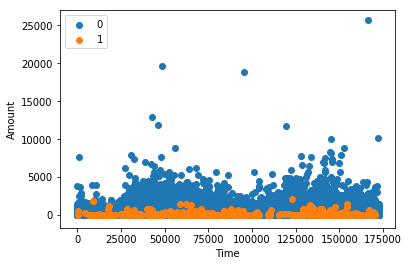

In [8]:
for i in range (2):
    plt.scatter(data.Time[data['Class']==i], data.Amount[data['Class']==i], label=i)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(loc='upper left')

** Create a stacked histogram showing Time based on the Class column.  **

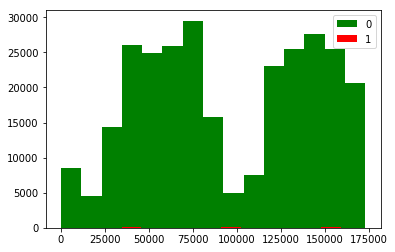

In [9]:
plt.hist(data.Time[data['Class']==0], bins=15,  color='green', label='0')
plt.hist(data.Time[data['Class']==1], bins=15,  color='red', label='1')
plt.legend()

## K Means Cluster Creation

Now it is time to create the Cluster labels!

** Import KMeans from SciKit Learn.**

In [10]:
from sklearn.cluster import KMeans

** Create an instance of a K Means model with 2 clusters.**

In [11]:
kmeans=KMeans(n_clusters=2)

**Fit the model to all the data except for the Class label.**

In [12]:
features = data.columns[:-1]
X = data[features].values

In [13]:
kmeans.fit(X)
# kmeans.fit(data.drop('Class',axis=1)) #more practical

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

** What are the cluster center vectors?**

In [14]:
kmeans.cluster_centers_

array([[  1.41079394e+05,   2.73841309e-01,  -5.15129814e-02,
         -7.06923728e-01,  -1.55087272e-01,   2.79419505e-01,
         -8.09747163e-02,   1.21057270e-01,  -6.12779332e-02,
          4.05093284e-02,   3.44966185e-02,  -2.43807104e-01,
          3.75474414e-02,  -3.36413435e-02,  -6.53613985e-02,
         -2.12100195e-01,   1.37947856e-02,  -5.10077661e-02,
          8.25446290e-02,   2.46502197e-02,  -4.59811406e-02,
          4.32967143e-02,   1.27685250e-01,   3.32608063e-02,
         -1.36174439e-02,  -1.35712979e-01,  -2.67117981e-02,
         -2.18132200e-03,  -3.31995128e-03,   8.79985610e+01],
       [  5.50490728e+04,  -2.35363999e-01,   4.42749171e-02,
          6.07594215e-01,   1.33296034e-01,  -2.40158405e-01,
          6.95969979e-02,  -1.04047571e-01,   5.26678003e-02,
         -3.48173821e-02,  -2.96495152e-02,   2.09549885e-01,
         -3.22716685e-02,   2.89144145e-02,   5.61774998e-02,
          1.82298098e-01,  -1.18564869e-02,   4.38406894e-02,
       

## Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

** Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [15]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data['Class'],kmeans.labels_))
print(classification_report(data['Class'],kmeans.labels_))

[[131482 152833]
 [   162    330]]
             precision    recall  f1-score   support

          0       1.00      0.46      0.63    284315
          1       0.00      0.67      0.00       492

avg / total       1.00      0.46      0.63    284807

